In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_nag = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.NAG.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: FUDOAZ15
Multi Layer Network Model - ID: U6D5AD0U
Multi Layer Network Model - ID: TM42AOAP
Multi Layer Network Model - ID: 181T3F0M
Multi Layer Network Model - ID: YF2DB3XP


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 3

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "Nesterov": n_nag, "AdaGrad": n_adagrad, "Adam": n_adam}
#neural_networks = {"AdaGrad": n_adagrad, "Adam": n_adam}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=1, 
        is_numba=True, 
        verbose=False
    )

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.319878 - Validation Error: 2.315453 - Test Accuracy: 0.106000
Epoch   1 Completed - Train Error: 0.412693 - Validation Error: 0.399572 - Test Accuracy: 0.881800
Epoch   2 Completed - Train Error: 0.268797 - Validation Error: 0.265455 - Test Accuracy: 0.919500
Epoch   3 Completed - Train Error: 0.208247 - Validation Error: 0.214073 - Test Accuracy: 0.934800

[Best Epoch (based on Validation Error) and Its Performance]
Epoch   3 Completed - Train Error: 0.208247 - Validation Error: 0.214073 - Test Accuracy: 0.934800
Params are set to the best model!!!
-- Learning Finished --

***Momentum***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.312664 - Validation Error: 2.309104 - Test Accuracy: 0.082100
Epoch   1 Completed - Train Error: 0.193634 - Validation Error: 0.207696 - Test Accuracy: 0.931000
Epoch   2 Completed - Train Error: 0.125199 - Validation Error: 0.149320 - Test Accuracy: 0.948900
Epoch   3 Comp

In [5]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format(
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

SGD        - Epoch:  3, Min Train Error: 0.20825, Min ValidationError: 0.21407, Max Test Accuracy: 0.93480
Momentum   - Epoch:  3, Min Train Error: 0.08261, Min ValidationError: 0.12663, Max Test Accuracy: 0.95890
Nesterov   - Epoch:  3, Min Train Error: 0.14420, Min ValidationError: 0.15161, Max Test Accuracy: 0.95520
AdaGrad    - Epoch:  3, Min Train Error: 0.10246, Min ValidationError: 0.13706, Max Test Accuracy: 0.95610
Adam       - Epoch:  3, Min Train Error: 0.35029, Min ValidationError: 0.35703, Max Test Accuracy: 0.88660


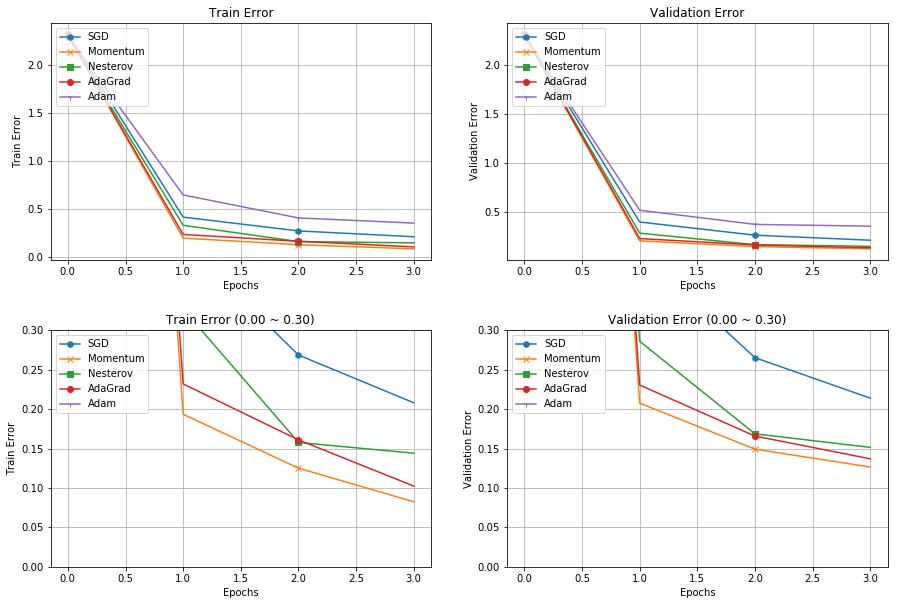

In [6]:
markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

/Users/yhhan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


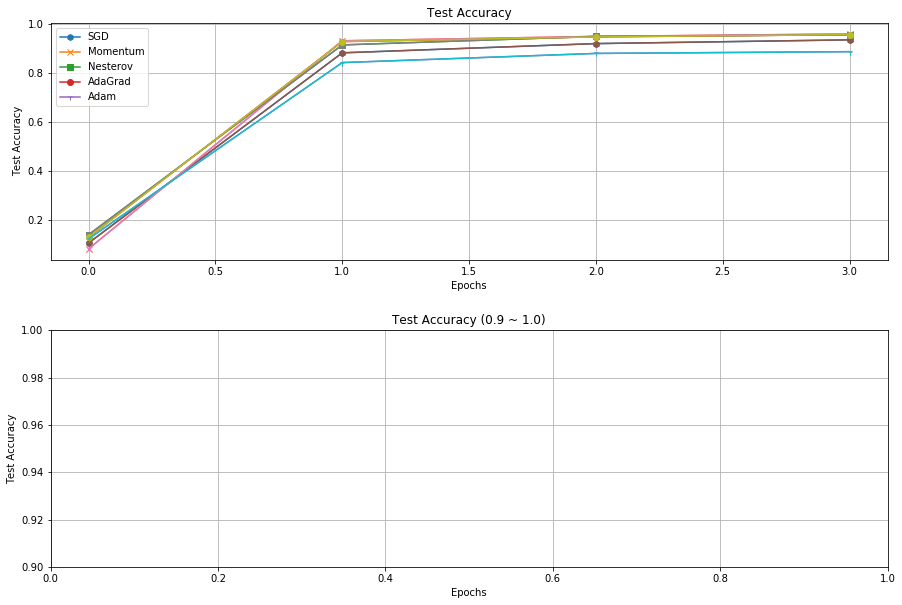

In [7]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.9, 1.0)
axarr[1].set_title('Test Accuracy (0.9 ~ 1.0)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()